# Pandas Tutorial

In [1]:
import numpy as np
import pandas as pd

## Series

In [2]:
s_list_1 = ['a', 'b', 'c', 'd']
indexes = np.arange(1, 5)

In [3]:
#Creating series. It's something similar to hashmap in Java
s_ser_1 = pd.Series(data=s_list_1, index=indexes)
s_ser_1

1    a
2    b
3    c
4    d
dtype: object

In [4]:
#Creating array by np array without indexes. In this case indexes will be nums from 0 to arr.length()
arr = np.array([1, 2, 3, 4, 5])
s_ser_2 = pd.Series(arr)
s_ser_2

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [5]:
#Creating series from dictionary
dict_1 = {'f_name': "Vitalii", 'l_name': "Stinskii", 'age': 22}
s_ser_3 = pd.Series(dict_1)
s_ser_3

f_name     Vitalii
l_name    Stinskii
age             22
dtype: object

In [6]:
#Get data from series
s_ser_3['f_name']

'Vitalii'

In [7]:
#Basic math with series +-*/ . Math operation will be apply only on data, but not on indexes
s_ser_2 * s_ser_2

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [8]:
#Using series with NumPy methods
np.exp(s_ser_2)

0      2.718282
1      7.389056
2     20.085537
3     54.598150
4    148.413159
dtype: float64

In [9]:
#The main difference between np arrays and pd series is that math operations apply by indexes. 
#In case when ser1 have index1 but ser2 doesn't have index1 the result of math operation will be NaN
s_ser_4 = pd.Series({4: 5, 5: 6, 6: 7, 7: 8})
print("s_ser_2:\n", s_ser_2)
s_ser_2 + s_ser_4

s_ser_2:
 0    1
1    2
2    3
3    4
4    5
dtype: int64


0     NaN
1     NaN
2     NaN
3     NaN
4    10.0
5     NaN
6     NaN
7     NaN
dtype: float64

In [10]:
#We can add a name to the series
s_ser_5 = pd.Series({4: 5, 5: 6, 6: 7, 7: 8}, name='rand_nums')
s_ser_5.name

'rand_nums'

## DataFrames

In [11]:
df_arr_1 = np.random.randint(10, 50, size=(2, 3))

In [12]:
#Creating dataFrame <array>, <row_names>, <column_names>
df_1 = pd.DataFrame(df_arr_1, ['A', 'B'], ['C', 'D', 'E'])
df_1

,C,D,E
A,31,31,14
B,20,38,23


In [13]:
#Creating df from dictionary. In case when we have disbalaced matrix in empty places will be NaN
df_dict_1 = {'one': pd.Series([1., 2., 3.,], index=['a','b','c']),
            'two': pd.Series([1., 2., 3., 4.], index=['a','b','c','d'])}
df_2 = pd.DataFrame(df_dict_1)
df_2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [14]:
#Creating df from dict that created in the same method
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [15]:
#Creating df from dict that created in the same method. Assign keys as row and column labels
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]),
                      orient='index', columns=['one','two','three'])

,one,two,three
A,1,2,3
B,4,5,6


In [16]:
#Get md length of df
np.shape(df_2)

(4, 2)

## Editing & Retrieving Data

In [17]:
#Get the column
print("df_1:\n", df_1)
df_1['C']

df_1:
     C   D   E
A  31  31  14
B  20  38  23


A    31
B    20
Name: C, dtype: int64

In [18]:
#Get the columns
print("df_1:\n", df_1)
df_1[['C','D']]

df_1:
     C   D   E
A  31  31  14
B  20  38  23


,C,D
A,31,31
B,20,38


In [19]:
#Get row as a series
print("df_1:\n", df_1)
df_1.loc['A']

df_1:
     C   D   E
A  31  31  14
B  20  38  23


C    31
D    31
E    14
Name: A, dtype: int64

In [20]:
#Grab row by index position
print("df_1:\n", df_1)
df_1.iloc[1]

df_1:
     C   D   E
A  31  31  14
B  20  38  23


C    20
D    38
E    23
Name: B, dtype: int64

In [21]:
#Grab element (cell) by a row and a column
print("df_1:\n", df_1)
df_1.loc['A','C']

df_1:
     C   D   E
A  31  31  14
B  20  38  23


31

In [22]:
#Get the spesific rows and columns
print("df_1:\n", df_1)
df_1.loc[['A','B'],['C','D']]

df_1:
     C   D   E
A  31  31  14
B  20  38  23


,C,D
A,31,31
B,20,38


In [23]:
#Add new column like sum of all the columns
df_1['Total'] = df_1['C'] + df_1['D'] + df_1['E']
df_1

,C,D,E,Total
A,31,31,14,76
B,20,38,23,81


In [24]:
#Add new column. Using multiplication to create new column
df_2['mult'] = df_2['one'] + df_2['two']
df_2

,one,two,mult
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [25]:
#Adding new row to df. Since 2.0 pandas version the append() method has been removed from DataFrame [?]
print("df_1:\n", df_1)
er_dict_1 = {'C': 44, 'D': 55, 'E': 46}
df_1 = pd.concat([df_1, pd.DataFrame(er_dict_1, index=['M'])])
df_1

df_1:
     C   D   E  Total
A  31  31  14     76
B  20  38  23     81


,C,D,E,Total
A,31,31,14,76.0
B,20,38,23,81.0
M,44,55,46,NaN


In [26]:
#Adding new row to df using .loc
print("df_1:\n", df_1)
er_dict_1 = {'C': 1, 'D': 1, 'E': 1}
df_1.loc['J'] = er_dict_1
df_1

df_1:
     C   D   E  Total
A  31  31  14   76.0
B  20  38  23   81.0
M  44  55  46    NaN


,C,D,E,Total
A,31,31,14,76.0
B,20,38,23,81.0
M,44,55,46,NaN
J,1,1,1,NaN


In [27]:
#Deleting a column <name> <dm> (0-rows 1 - columns) <inplace> 
#If inplace=False the row/column won't be deleted
print("df_1:\n", df_1)
df_1.drop('Total', axis=1, inplace=True)
df_1

df_1:
     C   D   E  Total
A  31  31  14   76.0
B  20  38  23   81.0
M  44  55  46    NaN
J   1   1   1    NaN


,C,D,E
A,31,31,14
B,20,38,23
M,44,55,46
J,1,1,1


In [28]:
#Deleting a row 
print("df_1:\n", df_1)
df_1.drop('J', axis=0, inplace=True)
df_1.drop('M', axis=0, inplace=True)
df_1

df_1:
     C   D   E
A  31  31  14
B  20  38  23
M  44  55  46
J   1   1   1


,C,D,E
A,31,31,14
B,20,38,23


In [29]:
#Creating a column and setting it as index row
df_1['S'] = ['Men','Woman']
df_1.set_index('S', inplace=True)
df_1

,C,D,E
S,,,
Men,31,31,14
Woman,20,38,23


In [30]:
#Reset df indexe. Makes previous index column as common column
#df_1.reset_index(inplace=True)
df_1

,C,D,E
S,,,
Men,31,31,14
Woman,20,38,23


In [31]:
#Creating row by pathing any func. For example basic math
print('df_2', df_2) 
df_2.assign(sum_pow_2=(df_2['one'] + df_2['two'])**2)

df_2    one  two  mult
a  1.0  1.0   2.0
b  2.0  2.0   4.0
c  3.0  3.0   6.0
d  NaN  4.0   NaN


,one,two,mult,sum_pow_2
a,1.0,1.0,2.0,4.0
b,2.0,2.0,4.0,16.0
c,3.0,3.0,6.0,36.0
d,NaN,4.0,NaN,NaN


In [32]:
#Creating row by pathing any func. For example basic math
print('df_2', df_2) 
df_2.assign(sum_pow_2=lambda x: (x['one'] * x['two']))

df_2    one  two  mult
a  1.0  1.0   2.0
b  2.0  2.0   4.0
c  3.0  3.0   6.0
d  NaN  4.0   NaN


,one,two,mult,sum_pow_2
a,1.0,1.0,2.0,1.0
b,2.0,2.0,4.0,4.0
c,3.0,3.0,6.0,9.0
d,NaN,4.0,NaN,NaN


In [33]:
#Combining 2 df. If there are empy elements (nan) in df1 by column index A 
# and df2 has not empty elements by the same column and rows indexs
# elements from the df2 fill the empty elems in df1
er_df_1 = pd.DataFrame({'A': [1., np.nan, 3., np.nan]})
er_df_2 = pd.DataFrame({'A': [8., 9., 2., 4.]})
er_df_1.combine_first(er_df_2)

,A
0,1.0
1,9.0
2,3.0
3,4.0


## Conditional Selection

In [34]:
cs_arr_1 = np.random.randint(10, 50, size=(2,3))
cs_df_1 = pd.DataFrame(cs_arr_1, ['A','B'], ['C','D','E'])
cs_arr_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
cs_ds_2 = pd.DataFrame(cs_arr_2, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
cs_df_1

,C,D,E
A,15,21,41
B,38,28,20


In [35]:
#Get the df of bool according to condition greater than 40
print("Greater than 40:\n", cs_df_1 > 40)

Greater than 40:
        C      D      E
A  False  False   True
B  False  False  False


In [36]:
#Get the df of bool according to condition greater than 40 in another way
# eq - ==, ne - !=, le - <=, lt - <, ge - >=, gt - >
print("Greater than 40:\n", cs_df_1.gt(40))

Greater than 40:
        C      D      E
A  False  False   True
B  False  False  False


In [37]:
#Get all the elements those applies to condition >= 30. In another case an element will be replaced with NaN
cs_bool_1 = cs_df_1 >= 30
cs_df_1[cs_bool_1]

,C,D,E
A,NaN,NaN,41.0
B,38.0,NaN,NaN


In [38]:
#The same thing but with columns
print("cs_df_1:\n", cs_df_1)
cs_df_1[cs_df_1['E'] > 30]

cs_df_1:
     C   D   E
A  15  21  41
B  38  28  20


,C,D,E
A,15,21,41


In [39]:
#Get elements by the condition and get the columns specific columns
print(cs_df_1[cs_df_1['E'] > 30][['D','E']])

    D   E
A  21  41


In [40]:
#Multiple conditions
print("cs_ds_2", cs_ds_2)
cs_ds_2[(cs_ds_2['X']>3) & (cs_ds_2['X']<7)]

cs_ds_2    X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9


,X,Y,Z
B,4,5,6


## File Input / Output
Pandas can work with the following types of data : CSV, Plain Text, JSON, XML, PDF, SQL, HTML, XLSX, DOCX, ZIP, Images Hierarchical Data Format, MP3, and MP4.

In [41]:
import pymysql

In [42]:
#Read csv df
csv_df_1 = pd.read_csv('ComputerSales.csv')
csv_df_1[:10]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018
6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018
7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018
8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018
9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018


In [43]:
#Converting df to csv
csv_df_1.to_csv('ComputerSales_backup.csv')

In [44]:
#Read excel df
pd.read_excel('Financial Sample.xlsx', 0)[:5]

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


In [45]:
#Convert df to excel
csv_df_1.to_excel('ComputerSales.xlsx')
pd.read_excel('ComputerSales.xlsx')[:10]

,Unnamed: 0,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
5,5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018
6,6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018
7,7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018
8,8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018
9,9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018


In [46]:
#Working with MySQL server
#Retrieve the data from db
try:
    db_connection = pymysql.connect(db='pandas_db', user='super_root', passwd='super_pass', host='localhost', port=3306)
    pandas_df = pd.read_sql('SELECT * FROM users', con=db_connection)
    print(pandas_df)
except Exception as e:
    print("Exception: {}".format(e))
finally:
    db_connection.close()

    id          username   upassword  age                          email
0    1         JohnSmith   password1   25            johndoe@example.com
1    2        AliceSmith   password2   30        alice.smith@example.com
2    3        BobJohnson   password3   28        bob.johnson@example.com
3    4         EmmaBrown   password4   22         emma.brown@example.com
4    5      MichaelDavis   password5   27      michael.davis@example.com
5    6      OliviaWilson   password6   29      olivia.wilson@example.com
6    7   WilliamMartinez   password7   26   william.martinez@example.com
7    8    SophiaAnderson   password8   31    sophia.anderson@example.com
8    9       JamesTaylor   password9   24       james.taylor@example.com
9   10       EmilyThomas  password10   23       emily.thomas@example.com
10  11         DanielLee  password11   33         daniel.lee@example.com
11  12        GraceWhite  password12   32        grace.white@example.com
12  13       AndrewClark  password13   35       and

/tmp/ipykernel_60407/2235223393.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pandas_df = pd.read_sql('SELECT * FROM users', con=db_connection)


In [47]:
#Add a row to the db
try:
    db_connection = pymysql.connect(db='pandas_db', user='super_root', passwd='super_pass', host='localhost', port=3306)
    cursor = db_connection.cursor()
    cursor.execute("INSERT INTO users VALUES(16, 'SuperUser', 'super_pass', '25', 'super.user@example.com')")
    db_connection.commit()
    pandas_df_2 = pd.read_sql('SELECT * FROM users', con=db_connection)
    print(pandas_df_2)
except Exception as e:
    print("Exception: {}".format(e))
finally:
    db_connection.close()

Exception: (1062, "Duplicate entry '16' for key 'users.PRIMARY'")


In [48]:
#Get a column from csv
csv_df_2 = pd.read_csv('ComputerSales.csv', usecols=["State"])[:10]
csv_df_2

,State
0,OH
1,WV
2,PA
3,PA
4,PA
5,PA
6,OH
7,OH
8,OH
9,WV


## Basics & Math

In [49]:
#Get first 5 results
csv_df_1.head()
bm_dict_1 = {"one":pd.Series([1., 2., 3.], index=['a','b','c']),
             "two":pd.Series([1., 2., 3.,4.], index=['a','b','c','d'])}
bm_df_1 = pd.DataFrame(bm_dict_1)
bm_df_2 = pd.DataFrame({'A': range(3), 'B': range(1,4)})

In [50]:
#Get last 5 results
csv_df_1.tail()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
34,35,Michelle Samms,F,46,NY,MY2J2LL,Tablet,999.99,146.69,Website,April,2020
35,36,Sally Struthers,F,45,NY,81TC00,Laptop,649.99,122.34,Website,April,2020
36,37,Jason Case,M,57,PA,M01-F0024,Desktop,479.99,143.39,Flyer 4,April,2020
37,38,Doug Johnson,M,51,PA,GA401IV,Laptop,1349.99,180.34,Website,May,2020
38,39,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,May,2020


In [51]:
#Get all indexes from df
csv_df_1.index.array

<NumpyExtensionArray>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
Length: 39, dtype: int64

In [52]:
#Convert df to numpy arr
csv_df_1.to_numpy()[:10]

array([[1, 'Paul Thomas', 'M', 43, 'OH', 'M01-F0024', 'Desktop', 479.99,
        143.39, 'Website', 'January', 2018],
       [2, 'Margo Simms', 'F', 37, 'WV', 'GT13-0024', 'Desktop', 1249.99,
        230.89, 'Flyer 4', 'January', 2018],
       [3, 'Sam Stine', 'M', 26, 'PA', 'I3670', 'Desktop', 649.99,
        118.64, 'Website', 'February', 2018],
       [4, 'Moe Eggert', 'M', 35, 'PA', 'I3593', 'Laptop', 399.99, 72.09,
        'Website', 'March', 2018],
       [5, 'Jessica Elk', 'F', 55, 'PA', '15M-ED', 'Laptop', 699.99,
        98.09, 'Flyer 4', 'March', 2018],
       [6, 'Sally Struthers', 'F', 45, 'PA', 'GT13-0024', 'Desktop',
        1249.99, 230.89, 'Flyer 2', 'April', 2018],
       [7, 'Michelle Samms', 'F', 46, 'OH', 'GA401IV', 'Laptop', 1349.99,
        180.34, 'Email', 'May', 2018],
       [8, 'Mick Roberts', 'M', 23, 'OH', 'MY2J2LL', 'Tablet', 999.99,
        146.69, 'Website', 'July', 2018],
       [9, 'Ed Klondike', 'M', 52, 'OH', '81TC00', 'Laptop', 649.99,
        122.34

In [53]:
#Convert series to numpy arr
s_ser_1.array

<NumpyExtensionArray>
['a', 'b', 'c', 'd']
Length: 4, dtype: object

In [54]:
#Replace NaNs with zeros
print(bm_df_1, "\n")
print(bm_df_1.fillna(0, inplace=True))

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0 

None


In [55]:
#Grab row by id and add it to other rows
print(bm_df_1, "\n")
row = bm_df_1.iloc[1]
print(row)
bm_df_1.add(row, axis='columns')

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0 

one    2.0
two    2.0
Name: b, dtype: float64


,one,two
a,3.0,3.0
b,4.0,4.0
c,5.0,5.0
d,2.0,6.0


In [56]:
#Take column 'two' and do 'one' - 'two'
column = bm_df_1['two']
bm_df_1.sub(column, axis=0)

,one,two
a,0.0,0.0
b,0.0,0.0
c,0.0,0.0
d,-4.0,0.0


In [57]:
#Check if df is empty
bm_df_1.empty

False

In [58]:
#Transform allows to use functions, for example lambda
print(bm_df_2)
bm_df_2.transform(lambda x: x**2)

   A  B
0  0  1
1  1  2
2  2  3


,A,B
0,0,1
1,1,4
2,4,9


In [59]:
#Should be 4 columns, for lambda1 and lambda2. But we have only columns for lamnda2
print(bm_df_2)

#bm_df_2.transform([lambda x: x**2, lambda x: x**3]) - do not work

#The next piece of code works
result = bm_df_2.apply(lambda x: pd.Series([x['A']**2, x['B']**2, x['A']**3, x['B']**3]), axis=1).rename(columns={
    0: 'A_squared', 1: 'B_squared', 2: 'A_cubed', 3: 'B_cubed'})
print(result)

   A  B
0  0  1
1  1  2
2  2  3
   A_squared  B_squared  A_cubed  B_cubed
0          0          1        0        1
1          1          4        1        8
2          4          9        8       27


In [60]:
#Transform columns
print(bm_df_2)
bm_df_2.transform({'A': lambda x: x**2,'B': lambda x: x**3})

   A  B
0  0  1
1  1  2
2  2  3


,A,B
0,0,1
1,1,8
2,4,27


In [61]:
#[*]
print(bm_df_2)
print(bm_df_2['A'].map(lambda x: x**2)) # should applies the functon to column A, but works wierd. 
                                        # It just adds 1 to last element of B column
print(bm_df_2.map(lambda x: x**2)) # applies the function on every element

   A  B
0  0  1
1  1  2
2  2  3
0    0
1    1
2    4
Name: A, dtype: int64
   A  B
0  0  1
1  1  4
2  4  9


In [62]:
#Edit element in df
print(bm_df_1)
bm_df_1.at['b','two'] = 1
bm_df_1

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


,one,two
a,1.0,1.0
b,2.0,1.0
c,3.0,3.0
d,0.0,4.0


In [63]:
#Get unique elements from column
print(bm_df_1)
bm_df_1['two'].unique()

   one  two
a  1.0  1.0
b  2.0  1.0
c  3.0  3.0
d  0.0  4.0


array([1., 3., 4.])

In [64]:
#Get total number of unique elements from column
print(bm_df_1)
bm_df_1['two'].nunique()

   one  two
a  1.0  1.0
b  2.0  1.0
c  3.0  3.0
d  0.0  4.0


3

In [65]:
#Counts how many times value showed ups in a column
print(bm_df_1)
bm_df_1['two'].value_counts()

   one  two
a  1.0  1.0
b  2.0  1.0
c  3.0  3.0
d  0.0  4.0


two
1.0    2
3.0    1
4.0    1
Name: count, dtype: int64

In [66]:
#Get name of the columns and rows (indexes)
print(bm_df_1.columns)
bm_df_1.index

Index(['one', 'two'], dtype='object')


Index(['a', 'b', 'c', 'd'], dtype='object')

In [67]:
#Return element as true if it's null
bm_df_1.isnull()

,one,two
a,False,False
b,False,False
c,False,False
d,False,False


## Group Data

In [68]:
gd_dict_1 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 
             'Sales': [26, 12, 18, 22]}

gd_df_1 = pd.DataFrame(gd_dict_1)

In [69]:
#Grouping by column and mean
print(gd_df_1)
by_store = gd_df_1.groupby('Store')
#by_store.mean() - does not work. It tries to mean the Flavor column too, and cause of non numeric type throws the error
by_store[['Sales']].mean()

   Store Flavor  Sales
0      1   Choc     26
1      2    Van     12
2      1  Straw     18
3      2   Choc     22


,Sales
Store,
1,22.0
2,17.0


In [70]:
#Sum of sales for store2
by_store.sum().loc[1]

Flavor    ChocStraw
Sales            44
Name: 1, dtype: object

In [71]:
#Much useful info: count, mean, std, min, 25%, 50%, 75%, max
by_store.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

## Concatenate Merge & Join Data

In [72]:
cd_df_1 = pd.DataFrame({'A': [1,2,3],
                        'B': [4,5,6]},
                        index=[1,2,3])
cd_df_2 = pd.DataFrame({'A': [7,8,9],
                        'B': [10,11,12]},
                        index=[4,5,6])
cd_df_3 = pd.DataFrame({'A': [1,2,3],
                        'B': [4,5,6],
                        'key': [1,2,3]})
cd_df_4 = pd.DataFrame({'A': [7,8,9],
                        'B': [10,11,12],
                        'key': [1,2,3]})
cd_df_5 = pd.DataFrame({'A': [1,2,3],
                        'B': [4,5,6]},
                        index=[1,2,3])
cd_df_6 = pd.DataFrame({'C': [7,8,9],
                        'D': [10,11,12]},
                        index=[1,4,5])

In [73]:
#Mergin 2 dfs
print(cd_df_1)
print(cd_df_2)
pd.concat([cd_df_1, cd_df_2])

   A  B
1  1  4
2  2  5
3  3  6
   A   B
4  7  10
5  8  11
6  9  12


,A,B
1,1,4
2,2,5
3,3,6
4,7,10
5,8,11
6,9,12


In [74]:
#Mergin 2 dfs using keys. Similar to SQL. Have different methods: inner, right, left, outer
print(cd_df_3)
print(cd_df_4)
pd.merge(cd_df_3, cd_df_4, how="inner", on="key")

   A  B  key
0  1  4    1
1  2  5    2
2  3  6    3
   A   B  key
0  7  10    1
1  8  11    2
2  9  12    3


,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [75]:
#Joining
cd_df_5.join(cd_df_6, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


## Statistics

In [76]:
st_df_1 = pd.read_csv('icecreamsales.csv')
st_df_1

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [77]:
#Discover is the sales of icecream rise with the temperature rises

#Column's elements count
st_df_1.count()

#Sum column's elements, skip null
st_df_1.sum(skipna=True)

Temperature     734
Sales          4800
dtype: int64

In [78]:
#Using more than 1 math func at the same time
print(bm_df_1.mean())
bm_df_2.agg(['mean','std'])

one    1.50
two    2.25
dtype: float64


,A,B
mean,1.0,2.0
std,1.0,1.0


## Iteration

In [79]:
i_ser_1 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
i_arr_1 = np.random.randint(10, 50, size=(2, 3))
i_df_1 = pd.DataFrame(i_arr_1, ['B', 'C'], ['C', 'D', 'E'])

In [80]:
#Iterate through series
print(i_ser_1)
for col in i_ser_1:
    print(col)

a    0
b    1
c    2
d    3
e    4
dtype: int64
0
1
2
3
4


In [81]:
#Iterate through df columns including labels
print(i_df_1, "\n")
for label, ser in i_df_1.items():
    print(label)
    print(ser)

    C   D   E
B  20  29  39
C  26  23  43 

C
B    20
C    26
Name: C, dtype: int64
D
B    29
C    23
Name: D, dtype: int64
E
B    39
C    43
Name: E, dtype: int64


In [82]:
#Iterate through df rows including indexes
for index, row in i_df_1.iterrows():
    print(f"{index}\n{row}")

B
C    20
D    29
E    39
Name: B, dtype: int64
C
C    26
D    23
E    43
Name: C, dtype: int64


In [83]:
#Get tupples that contain row data
for row in i_df_1.itertuples():
    print(row)

Pandas(Index='B', C=20, D=29, E=39)
Pandas(Index='C', C=26, D=23, E=43)


## Sorting

In [84]:
print(i_df_1)

    C   D   E
B  20  29  39
C  26  23  43


In [85]:
#Sort by index, ascending=False = reverse
i_df_1.sort_index(ascending=False)

,C,D,E
C,26,23,43
B,20,29,39


In [86]:
#Sort by values <colum_name>
i_df_1.sort_values(by='C')

,C,D,E
B,20,29,39
C,26,23,43


## Passing Data to Functions

In [87]:
import sys

In [88]:
#Pass df to functions
def get_profit_total(df):
    prof_ser = df['Profit']
    print(f"Total Profit : {prof_ser.sum()}")

get_profit_total(csv_df_1)

Total Profit : 5459.010000000001


In [89]:
#Adds two columns. First Name and Last Name
def split_name(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index=['First Name', 'Last Name']
        )
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

split_name(csv_df_1).head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk


## Aligning, Reindexing and Renaming Labels

In [90]:
al_ser_1 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
print(al_ser_1)
al_ser_2 = al_ser_1[:4]
al_ser_3 = al_ser_1[1:]
print(al_ser_1)
print(al_ser_2)

al_arr_1 = np.random.randint(10, 50, size=(2, 3))
al_df_1 = pd.DataFrame(al_arr_1, ['A', 'B'], ['C', 'D', 'E'])
al_arr_2 = np.random.randint(10, 50, size=(2, 3))
al_df_2 = pd.DataFrame(al_arr_2, ['B', 'C'], ['C', 'D', 'E'])

a    0
b    1
c    2
d    3
e    4
dtype: int64
a    0
b    1
c    2
d    3
e    4
dtype: int64
a    0
b    1
c    2
d    3
dtype: int64


In [91]:
#Connects series. Similar to SQL
al_ser_2.align(al_ser_2, join="right")

(a    0
 b    1
 c    2
 d    3
 dtype: int64,
 a    0
 b    1
 c    2
 d    3
 dtype: int64)

In [92]:
#Connect dfs
al_df_1.align(al_df_2)

(      C     D     E
 A  19.0  14.0  28.0
 B  37.0  15.0  18.0
 C   NaN   NaN   NaN,
       C     D     E
 A   NaN   NaN   NaN
 B  42.0  11.0  25.0
 C  40.0  48.0  39.0)

In [93]:
#Reindex series. It's not change the index of the row, it chanes the place of the row
#If put a new index, new element will be NaN
print(al_ser_3)
al_ser_3.reindex(['c','b','e','d'])

b    1
c    2
d    3
e    4
dtype: int64


c    2
b    1
e    4
d    3
dtype: int64

In [94]:
#Reindex dfs
print(al_df_1)
al_df_1.reindex(['B','A'])

    C   D   E
A  19  14  28
B  37  15  18


,C,D,E
B,37,15,18
A,19,14,28


In [95]:
#Drop axis=0 - columns axis=1 - rows
al_df_1.drop('A', axis=0, inplace=True)
al_df_1

,C,D,E
B,37,15,18


In [96]:
#Rename column labes
print(al_df_1)
al_df_1.rename(columns={'C': 'Pets', 'D': 'Dolphins'})

    C   D   E
B  37  15  18


,Pets,Dolphins,E
B,37,15,18


## MultiIndex

In [97]:
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
meals = [1,2,3,1,2,3]
hier_index = list(zip(days, meals))
hier_index = pd.MultiIndex.from_tuples(hier_index)
m_arr_1 = np.random.randint(500, 700, size=(6, 2))
m_df_1 = pd.DataFrame(m_arr_1, hier_index, ['M', 'F'])
print(m_df_1)

           M    F
Day 1 1  516  557
      2  560  648
      3  509  504
Day 2 1  567  612
      2  613  595
      3  672  576


In [98]:
#Get one meal as series
m_df_1.loc['Day 1'].loc[1]

M    516
F    557
Name: 1, dtype: int64

In [99]:
#Add index names
m_df_1.index.names = ['Day','Meal']
m_df_1

M    F
Day   Meal          
Day 1 1     516  557
      2     560  648
      3     509  504
Day 2 1     567  612
      2     613  595
      3     672  576

In [100]:
#Cross section [*]
m_df_1.xs('Day 2')

,M,F
Meal,,
1,567,612
2,613,595
3,672,576


In [101]:
#Get 1st meal calories for both days
m_df_1.xs(1, level='Meal')

,M,F
Day,,
Day 1,516,557
Day 2,567,612


In [102]:
#Creating a MultiIndex using pivot (out of df)
m_dict_1 = {'A':['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2'],
         'B': [1,2,3,1,2,3],
         'C': ['M', 'F', 'M', 'F', 'M', 'F'],
         'D': [1,2,3,4,5,6]}
m_df_3 = pd.DataFrame(m_dict_1)
# Designate the D column is the data
# Make A & B a multilevel index
# Define column names come from column C
# You will have NaNs where data was missing
m_df_3.pivot_table(values='D', index=['A','B'], columns=['C'])

C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  NaN
      3  NaN  3.0
Day 2 1  4.0  NaN
      2  NaN  5.0
      3  6.0  NaN

## Handling Missing Data

In [103]:
hd_dict_1 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
hd_df_1 = pd.DataFrame(hd_dict_1)
print(hd_df_1)

     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


In [104]:
#drop all the NaN have axis
hd_df_1.dropna()

,A,B,C
0,1.0,4.0,7.0


In [105]:
#drop all the NaN with axis
hd_df_1.dropna(axis=1)

,C
0,7.0
1,8.0
2,9.0


In [106]:
#drops columns that have 2 or more NaN 
hd_df_1.dropna(thresh=2)

,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0


In [107]:
#Fill NaN elements with specific values
hd_df_1.fillna(value=0.0)

,A,B,C
0,1.0,4.0,7.0
1,2.0,0.0,8.0
2,0.0,0.0,9.0


In [108]:
#Fill NaN elements with mean()
hd_df_1.fillna(value=hd_df_1['A'].mean())

,A,B,C
0,1.0,4.0,7.0
1,2.0,1.5,8.0
2,1.5,1.5,9.0


In [109]:
#Fill NaN elements with previus value in the row
hd_df_1.fillna(method='ffill')

/tmp/ipykernel_60407/1276245031.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hd_df_1.fillna(method='ffill')


,A,B,C
0,1.0,4.0,7.0
1,2.0,4.0,8.0
2,2.0,4.0,9.0


## Visualisation

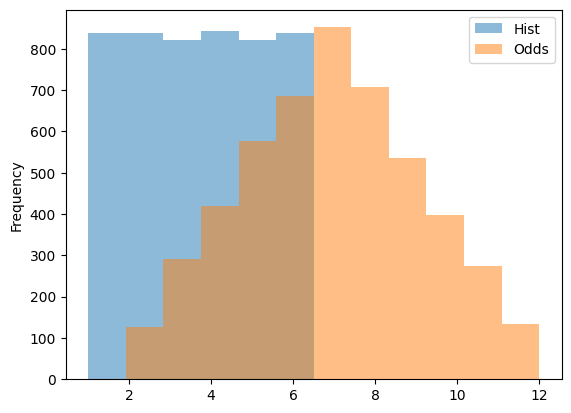

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

#Histagram from df
df_dice = pd.DataFrame(
    np.random.randint(1,7,5000),
    columns = ['Hist'])
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
ax = df_dice.plot.hist(bins=12, alpha=0.5)

<Axes: >

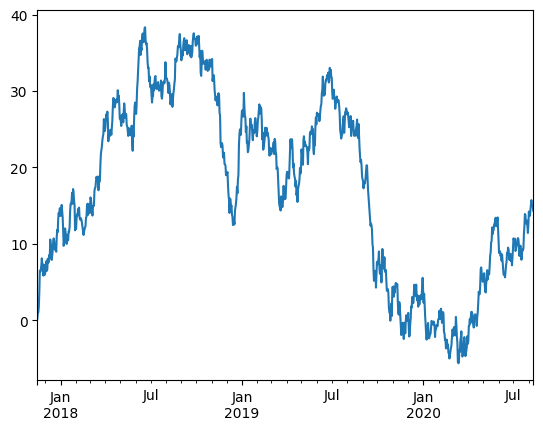

In [111]:
# Basic plot using 1000 random values that create cumulative sums
# over an increasing date range
ser_5 = pd.Series(np.random.randn(1000),
                 index=pd.date_range('11/15/2017', periods=1000))
ser_5 = ser_5.cumsum()
ser_5.plot()



<Axes: >

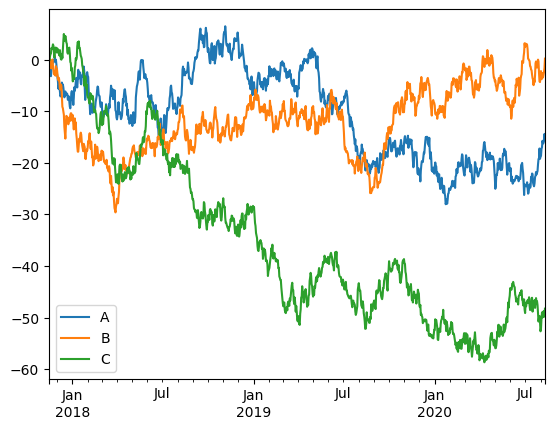

In [112]:
#Displays 3 random plots
df_15 = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('11/15/2017', periods=1000),
                    columns=list('ABC'))
df_15 = df_15.cumsum()
df_15.plot()

<Axes: >

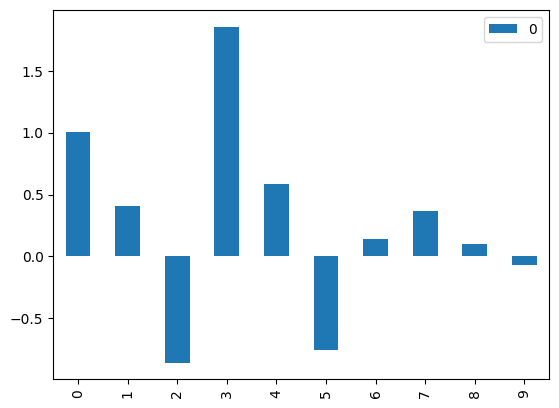

In [113]:
#Display bar chart
pd.DataFrame(np.random.randn(10)).plot.bar()

<Axes: >

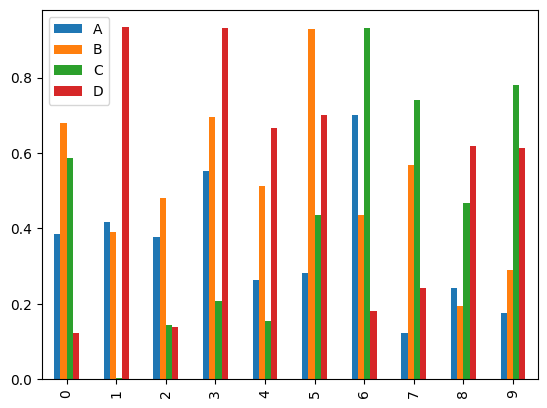

In [114]:
#Make MultiBar Charts
vals = ['A', 'B', 'C', 'D']
df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
df_15.plot.bar()

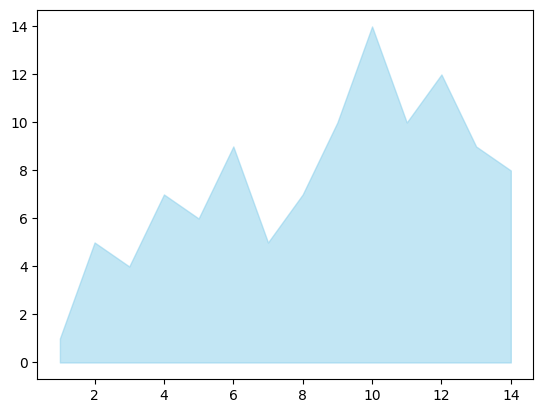

In [115]:
#Creates area plot
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]
plt.fill_between(x_rng, y_vals, color="skyblue", alpha=0.5)
plt.show()

<Axes: >

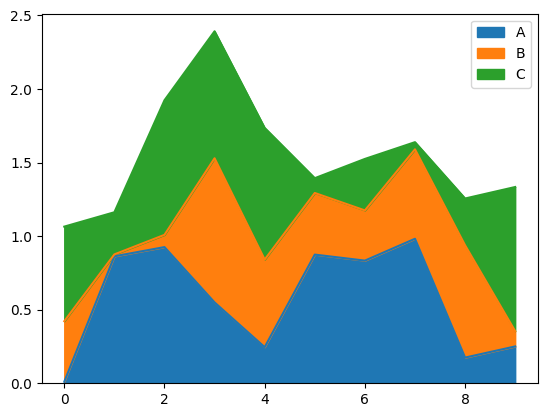

In [116]:
#Area plot with multiple areas
pd.DataFrame(np.random.rand(10,3), columns=['A','B','C']).plot.area()

<Axes: ylabel='Pie'>

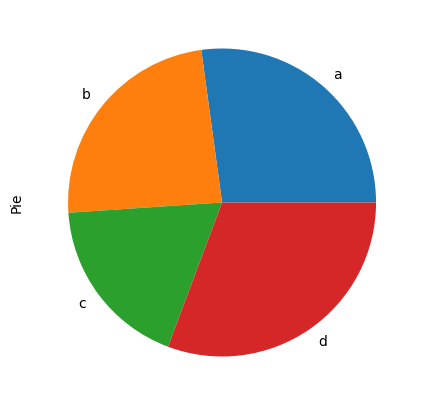

In [117]:
#Pie Charts with 4 random values
pd.Series(np.random.rand(4),
          index=['a','b','c','d'], 
          name='Pie').plot.pie(figsize=(5,5))